# 1. General Function
ก่อนที่เราจะเรียนรู้ indicator ต่างๆ ที่ใช้ในตลาดหุ้นนั้น เราจำเป็นต้องมี function ในการดึงข้อมูลหุ้นและการสร้างกราฟก่อน เพื่อที่จะทำให้ง่ายต่อการเรียกใช้ function ดังกล่าวในอนาคต 

### --Format--
ในส่วนของการเขียน python ในบทต่อไปนั้น ผมจะเขียนด้วยรูปแบบดังนี้
1. การเรียน library ที่จำเป็น
2. หลักการทำงานของ function นั้นๆ รวมไปถึงคำอธิบายคร่าวๆ ของ indicator
3. ทดลองสร้างกราฟเพื่อเทียบผลของ indicator และกราฟราคาจริง
4. คำนวนผลตอบแทนของ indicator 
5. code บางส่วน่ใช้ซ้ำ จะถูกเขียนเป็น function ตอนท้าย จากนั้นจะถูกคัดลอกลงใน func.py เพื่อให้ง่ายต่อการใช้ซ้ำในอนาคต

## 1.1 function ดึงข้อมูลหุ้น (get_stock_data)

Function การดึงข้อมูลหุ้น ผมอ้างอิงวิธีจาก https://medium.com/@uraibeef/finance-การดึงข้อมูลหุ้นด้วย-python-c8cfaabb2637

In [1]:
# เรียก library ที่จำเป็น
import datetime as dt 
import pandas as pd 
import pandas_datareader.data as web 

C:\Users\opalt\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# การดึงข้อมูลหุ้นด้วย Python โดยเราใส่ชื่อหุ้นที่เราสนใจ แล้วตามด้วย .BK
stock_name = "AOT.BK"
# กำหนดวันเริ่มต้นที่เราสนใจดึงข้อมูล ปี เดือน วัน 
start_date = dt.date(2010,1,1)
# กำหนดวันสิ้นสุดที่เราสนใจดึงข้อมูล ปี เดือน วัน
end_date = dt.date(2020,5,23)

In [3]:
# ดึงข้อมูลมาเก็บในรูปแบบของตาราง
df = web.get_data_yahoo(stock_name, start_date,end_date)
# จัดแต่งให้อยู่กับ format ที่เหมาะสม โดยการจัด หัวตารางและการแก้ค่า index 
df.columns = df.columns.get_level_values(0)
df.reset_index(inplace = True) 

In [4]:
# ตัวอย่างตารางของหุ้นที่ทดลองดึง
df.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,3.975,3.850,3.975,3.875,8696000.0,0.928125
1,2010-01-05,3.975,3.875,3.900,3.900,13227000.0,0.934113
2,2010-01-06,3.950,3.900,3.900,3.950,8872000.0,0.946088
3,2010-01-07,4.075,3.925,3.975,4.000,37878000.0,0.958064
4,2010-01-08,4.025,3.950,4.025,4.000,9978000.0,0.958064


In [5]:
# หากต้องการบันทึก file ไว้สำหรับใช้ต่อในอนาคต สามารถทำได้โดย
## สำหรับ .csv format
df.to_csv('AOT.csv',index = False)
## สำหรับ .xlsx format
df.to_excel('AOT.xlsx',index = False)

In [6]:
# เขียนเป็น function ไว้สำหรับการเรียกใช้งานในอนาคต
def get_stock_data(stock_name,start_date,end_date = False):
    '''
    Input1: stock_name ชื่อหุ้น เช่น 'PTT', 'SCC', 'AOT'
    Input2: start_date วันเริ่มต้น โดยเขียนในรูปแบบ dt.date(2015,1,1) -> ปี เดือน วัน
    Input3: end_date วันสิ้นสุด หากมี ให้ใช้ format เหมือนกับ start_date โดยมีค่าเริ่มต้นไว้ที่ False ซึ่งหมายถึงว่า ให้เรียกผลวันสุดท้ายของข้อมูลที่มี
    Output: ตารางข้อมูล
    Description: ดึงข้อมูลหุ้นใดๆ ในตลาดหุ้น SET ตั้งแต่/ไปถึง วันเวลา ที่กำหนด
    '''
    stock_name =  f'{stock_name}.BK'
    if end_date == False:
        df = web.get_data_yahoo(stock_name, start_date)
    else:
        df = web.get_data_yahoo(stock_name, start_date, end_date)
    df.columns = df.columns.get_level_values(0)
    df.reset_index(inplace = True) 
    return df    

จากนั้นผมได้คัดลอก function ดังกล่าวลงไปใน func.py ซึ่งวิธีการเรียกใช้ function นี้ในอนาคต สามารถทำได้โดย

In [7]:
# เรียก function ที่เราได้เขียนไว้ในบทก่อนหน้า
from func import * 

ซึ่งหากเราลืมรายละเอียดการใช้งานของ function เราสามารถใช้ help() เพื่อแสดงรายละเอียดของ function นั้นๆ

In [8]:
help(get_stock_data)

Help on function get_stock_data in module func:

get_stock_data(stock_name, start_date, end_date=False)
    Input1: stock_name ชื่อหุ้น เช่น 'PTT', 'SCC', 'AOT'
    Input2: start_date วันเริ่มต้น โดยเขียนในรูปแบบ dt.date(2015,1,1) -> ปี เดือน วัน
    Input3: end_date วันสิ้นสุด หากมี ให้ใช้ format เหมือนกับ start_date โดยมีค่าเริ่มต้นไว้ที่ False ซึ่งหมายถึงว่า ให้เรียกผลวันสุดท้ายของข้อมูลที่มี
    Output: ตารางข้อมูล
    Description: ดึงข้อมูลหุ้นใดๆ ในตลาดหุ้น SET ตั้งแต่/ไปถึง วันเวลา ที่กำหนด



## 1.2 การสร้างกราฟแท่งเทียน

กราฟแท่งเทียนในแสดงการเคลื่อนไหวของราคาหุ้นและการเทียบประสิทธิภาพของ indicator ต่างๆ ซึ่งจะมีการเปรียนเทียบทั้งหมด 2 แบบ โดยใช้ Plotly ซื่งสามารถอ่านเพิ่มเติมได้จาก https://plotly.com/python/candlestick-charts/

ซึ่งในบทต่อไปนั้น ผมจะมีการใช้กราฟทั้งหมด 2 รูปแบบคือ

1. การเทียบเส้น indicator บนกราฟแท่งเทียนไปเลย
2. การเทียบเส้น indicator กับกราฟแท่งเทียนตามแกนเวลา

โดยก่อนอื่นเลย เราจำเป็นต้องเรียก library ที่จำเป็นและตามด้วยหุ้นที่เราสนใจ

In [20]:
# เรียก library ที่จำเป็น
import numpy as np
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [21]:
# สมมุติว่าเราสนใจข้อมูลหุ้นของ บริษัท ท่าอากาศยานไทย จำกัด (AOT) จากปี 2017 จนถึงปัจจุบัน
AOT = get_stock_data('AOT',dt.date(2017,1,1), end_date = False)

จากนั้นเราใช้ function Candlestick จาก library ของ plotly ได้โดยดังนี้ 

ซื่งแทน ตาราง AOT ลงในตัวแปรดังต่อไปนี้ 
* x (ค่าแกน x หรือในกรณีนี้คือ time series)
* open (ราคาเปิดของแต่ละวัน)
* high (ราคาสูงสุดของแต่ละวัน)
* low (ราคาต่ำสุดของแต่ละวัน)
* close (ราคปิดของแต่ละวัน)

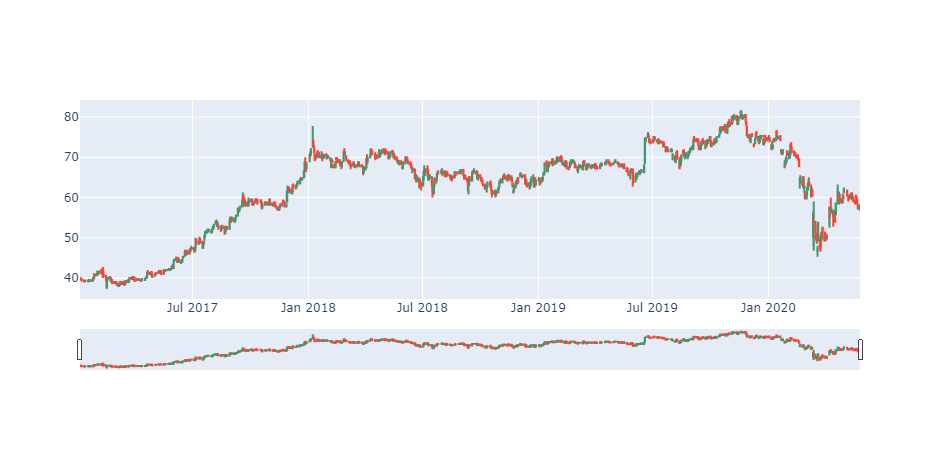

In [22]:
fig = go.Figure(
        go.Candlestick(
            x=AOT['Date'],
            open=AOT['Open'],
            high=AOT['High'],
            low=AOT['Low'],
            close=AOT['Close']))
fig.show()

### 1.2.1. การเทียบเส้น indicator บนกราฟแท่งเทียนไปเลย

In [23]:
# สำหรับ indicator ที่เราใช้ในตัวอย่างนี้ คือเส้นราคาปิด + 5 บาท
AOT['indicator1'] = AOT['Close'] + 5

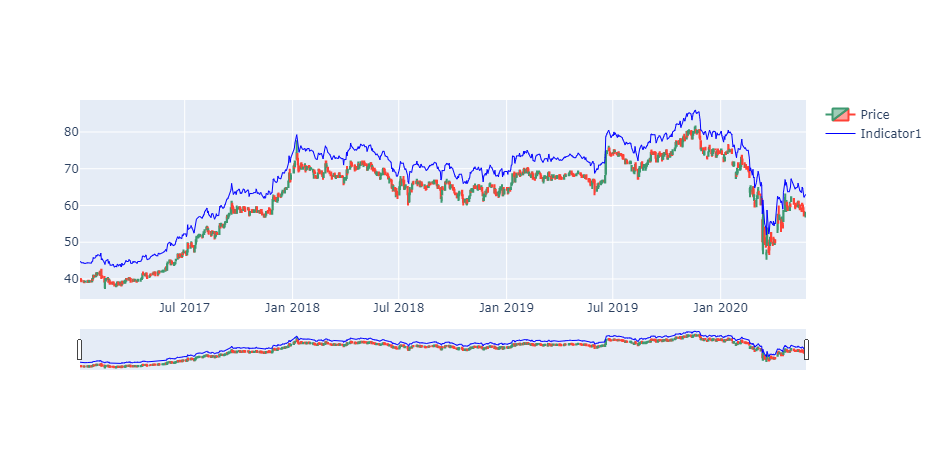

In [24]:
# กราฟเดิมจากตัวอย่างก่อนหน้านี้
fig = go.Figure(
        go.Candlestick(
            x=AOT['Date'],
            open=AOT['Open'],
            high=AOT['High'],
            low=AOT['Low'],
            close=AOT['Close'],
            name="Price"))

# ส่วนที่เพิ่มเข้ามาในการสร้าง indicator
## line เพิ่มเข้ามาเพื่อเปลี่ยนสีและขนาดของเส้น
fig.add_trace(
    go.Scatter(
        x=AOT["Date"],
        y=AOT['indicator1'],
        name='Indicator1',
        line=dict(color='blue', width=1)))

fig.show()

### 1.2.2. การเทียบเส้น indicator กับกราฟแท่งเทียนตามแกนเวลา

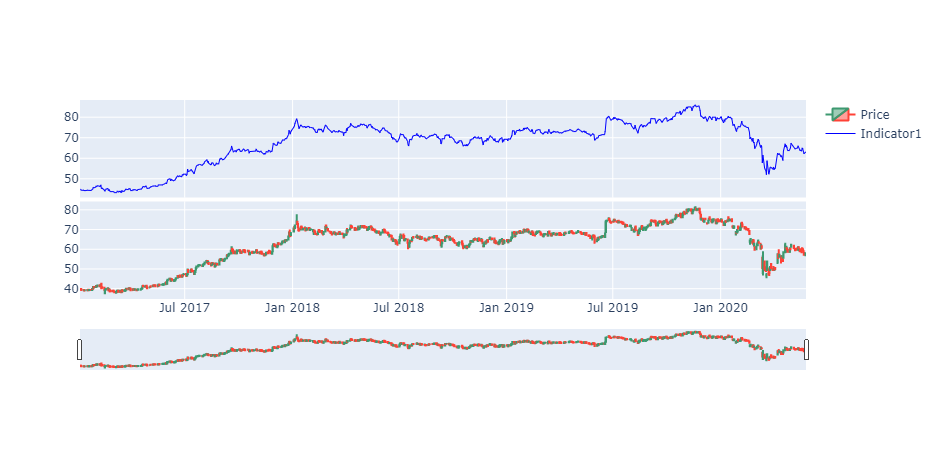

In [14]:
# สร้าง layout ของกราฟ โดยกำหนดให้มี 2 rows กับ 1 column ใช้แกนเวลาร่วมกัน และทำให้กราฟสองกราฟติดกัน
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# กราฟแท่งเทียนหลัก โดยกำหนดให้อยู่ row ล่างสุด
fig.append_trace(
        go.Candlestick(
            x=AOT['Date'],
            open=AOT['Open'],
            high=AOT['High'],
            low=AOT['Low'],
            close=AOT['Close'],
            name="Price"),
            2,1)

# กราฟของ indicator โดยกำหนดให้อยู่ row บนกราฟแท่งเทียนหลัก
fig.add_trace(
    go.Scatter(
        x=AOT["Date"],
        y=AOT['indicator1'],
        name='Indicator1',
        line=dict(color='blue', width=1)),
        1,1)

fig.show()

จากกราฟด้านบนทั้ง 2 กราฟ สามารถเขียนเป็น function ได้ตาม code ด้านล่าง โดย indicator จากทั้ง 2 functions จะอยู่ในรูปของการใช้คำสั่ง for loop เพราะว่า ในความเป็นจริงแล้ว เราอาจมีความจำเป็นต้องสร้างเส้น indicator มากกว่า 1 เส้นในกราฟเดียว และมีการเพิ่ม function ของ color list ขึ้นมาเพราะว่า เราต้องการ plot สีของเส้น indicator ให้ห่างกัน

In [15]:
# 0. การกำหนดสีของเส้นให้ต่างกัน
def color_list():
    '''
    Output: list ของชื่อสีที่แตกต่างกัน
    Description:  คืนค่าเป็น list ของชื่อสีที่แตกต่างกัน โดยการใช้งาน ทำได้โดย color_list()[0], color_list()[1], ...    
    '''
    return ['Blue','Orange','Purple','Gray','Pink','Gold','Violet']

In [16]:
# 1. การเทียบเส้น indicator บนกราฟแท่งเทียนไปเลย
def get_candlestick(df,indicator=[]):
    '''
    Input1: df ตารางข้อมูลของหุ้นที่สนใจ
    Input2: indicator ชื่อของ column ที่ต้องการตีเส้นไปบนกราฟราคา โดยมีค่าเริ่มต้นไว้ที่ [] -> ไม่รับค่าใดๆ เมื่อต้องการใช้ ex ['EMA','SMA']
    Output: กราฟ candlestick 
    Description: นำตารางมาสร้างกราฟ candlestick และมีเส้น indicator กำกับจาก input2 ซึ่งแต่ละเส้น indicator จะมีสีจาก function ของการกำหนดสีของเส้นให้ต่างกัน
    '''
    # กราฟเดิมจากตัวอย่างก่อนหน้านี้
    fig = go.Figure(
            go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name="Price"))

    # ส่วนที่เพิ่มเข้ามาในการสร้าง indicator
    for i in range(len(indicator)):       
        fig.add_trace(
            go.Scatter(
                x=df["Date"],
                y=df[indicator[i]],
                name=indicator[i],
                line=dict(color=color_list()[i], width=1)))
    fig.show()

In [17]:
# 2. การเทียบเส้น indicator กับกราฟแท่งเทียนตามแกนเวลา
def get_candlestick_subplot(df,indicator=[]):
    '''
    Input1: df ตารางข้อมูลของหุ้นที่สนใจ
    Input2: list ชื่อของ column/indicator ที่ต้องการตีเส้นไปบนกราฟใหม่เลย เช่น ['indicator1','indicator2']
    Output: กราฟ candlestick 
    Description: นำตารางมาสร้างกราฟ candlestick และกราฟ indicator แบบบนล่างตามแนวนอน ซึ่งแต่ละเส้น indicator จะมีสีจาก function ของการกำหนดสีของเส้นให้ต่างกัน
    '''
    # สร้าง layout ของกราฟ โดยกำหนดให้มี 2 rows กับ 1 column ใช้แกนเวลาร่วมกัน และทำให้กราฟสองกราฟติดกัน
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

    # กราฟแท่งเทียนหลัก โดยกำหนดให้อยู่ row ล่างสุด
    fig.append_trace(
            go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name="Price"),
                2,1)

    # กราฟของ indicator โดยกำหนดให้อยู่ row บนกราฟแท่งเทียนหลัก
    for i in range(len(indicator)):       
        fig.add_trace(
            go.Scatter(
                x=df["Date"],
                y=df[indicator[i]],
                name=indicator[i],
                line=dict(color=color_list()[i], width=1)),
                1,1)

    fig.show()   